Generating Project_Growth chart...


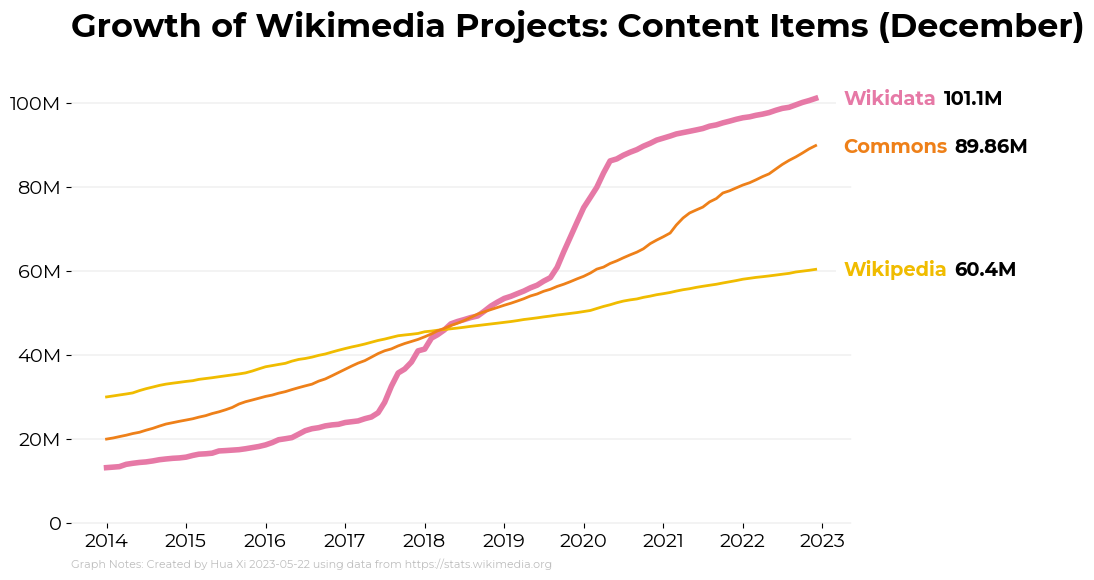

In [3]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os
from os.path import dirname
#local
#from wikicharts import Wikichart, wmf_colors
#jupyter notebook
%run wikicharts.ipynb

def main():
    print("Generating Project_Growth chart...")

    #---PARAMETERS---
    save_file_name = "Project_Growth.png"
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    #Data Columns: "month", "total.content", "timeRange.start", "timeRange.end"
    df_wikidata = pd.read_csv(home_dir + '/resources/data/wikidata_growth.csv', sep=',')
    df_wikipedia = pd.read_csv(home_dir + '/resources/data/wikipedia_growth.csv', sep=',')
    df_commons = pd.read_csv(home_dir + '/resources/data/commons_growth.csv', sep=',')

    #note start and end dates may be different depending on chart_type
    start_date = "2014-01-01"
    end_date = datetime.today()

    #convert string to datetime
    df_wikidata['month'] = df_wikidata['month'].apply(lambda x: x.rsplit("T")[0])
    df_wikipedia['month'] = df_wikipedia['month'].apply(lambda x: x.rsplit("T")[0])
    df_commons['month'] = df_commons['month'].apply(lambda x: x.rsplit("T")[0])
    df_wikidata['month'] = pd.to_datetime(df_wikidata['month'])
    df_wikipedia['month'] = pd.to_datetime(df_wikipedia['month'])
    df_commons['month'] = pd.to_datetime(df_commons['month'])

    #change column names
    df_wikidata = df_wikidata.rename(columns={'total.content':'wikidata'})
    df_wikipedia = df_wikipedia.rename(columns={'total.content':'wikipedia'})
    df_commons = df_commons.rename(columns={'total.content':'commons'})

    #drop unneeded columns
    df_wikidata = df_wikidata.drop(columns=['timeRange.start', 'timeRange.end'])
    df_wikipedia = df_wikipedia.drop(columns=['timeRange.start', 'timeRange.end'])
    df_commons = df_commons.drop(columns=['timeRange.start', 'timeRange.end'])

    #merge into one dataframe
    df = pd.merge(pd.merge(df_wikidata,df_wikipedia,on='month'),df_commons,on='month')

    #truncate date
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]

    #get last availablemonth, and use to set custom month_interest in the monthlyscatter line
    lastmonth = df.iloc[-1]['month'].month

    #---PREPARE TO PLOT
    key = pd.DataFrame([['Wikidata',wmf_colors['pink']],
        ['Wikipedia',wmf_colors['yellow']],
        ['Commons',wmf_colors['orange']]],
        index=['wikidata','wikipedia','commons'],
        columns=['labelname','color'])

    #---PLOT---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width=12)
    chart.plot_line('month','wikidata',key.loc['wikidata','color'],linewidth=4)
    chart.plot_line('month','wikipedia',key.loc['wikipedia','color'])
    chart.plot_line('month','commons',key.loc['commons','color'])
    chart.format(title = f'Growth of Wikimedia Projects: Content Items',
        radjust=0.75,
        data_source="https://stats.wikimedia.org")
    chart.multi_yoy_annotate(['wikidata','wikipedia','commons'],key,chart.calc_finalcount,xpad=0)
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()